<img src="https://user-images.githubusercontent.com/43984584/71158338-1bc44b80-2287-11ea-99d9-6499ec97788f.png" align="left">

# 목표: Binary classification, Multiple classification
- ## Binary classfication: 아시아나항공, 대한항공
- ## Multiple classification: 아시아나항공, 대한항공, 싱가포르 항공, 카타르 항공

<img src="https://user-images.githubusercontent.com/43984584/71158392-339bcf80-2287-11ea-8b96-031f8085c527.png" align="left">

### 개요: 여기서는 Binary classification을 분류해보고 Multiple은 `[프로젝트] Multiple Classification for Aircraft Ver1` 에서 진행하고자 한다.

<img src="https://user-images.githubusercontent.com/43984584/71158495-68a82200-2287-11ea-8494-2247db54af1b.png" align="left">

<img src="https://user-images.githubusercontent.com/43984584/71158791-e2d8a680-2287-11ea-8556-3eca28380c4e.png" align="left">

## 플리커 API를 활용한 사진 download.py

```bash
# Flickr로 사진 검색해서 다운로드하기
# https://medium.com/@adrianmrit/creating-simple-image-datasets-with-flickr-api-2f19c164d82f

from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

# AP 키 지정하기--- ( ※ 1)
key = "c36c0ec53b612a9face23fd8af97e0a3"
secret = "d7049ed458d2d007"
wait_time = 1 # 대기 시간(초)
SIZES = ["url_o", "url_k", "url_h", "url_l", "url_c"]

# 키워드와 디렉터리 이름 지정해서 다운로드하기 --- ( ※ 2)
def main():
    go_download('qatar airline', 'qatar_airline')
    # go_download('asianaairlines', 'asianaairlines')
    # go_download('koreanair', 'koreanair')


# 사진 사이즈

# url_o: Original (4520 × 3229)
# url_k: Large 2048 (2048 × 1463)
# url_h: Large 1600 (1600 × 1143)
# url_l=: Large 1024 (1024 × 732)
# url_c: Medium 800 (800 × 572)
# url_z: Medium 640 (640 × 457)
# url_m: Medium 500 (500 × 357)
# url_n: Small 320 (320 × 229)
# url_s: Small 240 (240 × 171)
# url_t: Thumbnail (100 × 71)
# url_q: Square 150 (150 × 150)
# url_sq: Square 75 (75 × 75)


# Flickr API로 사진 검색하기 --- (*3)
def go_download(keyword, dir):
    # extras = ','.join(SIZES)
    # print(extras)
    # 저장 경로 지정하기
    savedir = "./data/" + dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    # API를 사용해서 다운로드하기 --- (*4)
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
      text = keyword,     # 키워드
      per_page = 2000,     # 검색할 개수
      media = 'photos',   # 사진 검색
      sort = "relevance", # 키워드 관련도 순서
      safe_search = 1,    # 안전 검색
      extras = 'url_q, license')
      # extras = extras)

        # 결과 확인하기
    photos = res['photos']
    pprint(photos)
    try:
        for i, photo in enumerate(photos['photo']):
            url = photo["url_q"]
            filepath = savedir + '/' + photo['id'] + '.jpg'
            if os.path.exists(filepath): continue
            print(str(i + 1) + ":download=", url)
            urlretrieve(url, filepath)
            time.sleep(wait_time)
    except:
      import traceback
      traceback.print_exc()

if __name__ == '__main__':
    main()


```

### 구글이미지 다운로드, google_image_download 모듈 활용

<img src="https://user-images.githubusercontent.com/43984584/71159703-7a8ac480-2289-11ea-990d-f69f2874586d.png" align="left">
<img src="https://user-images.githubusercontent.com/43984584/71159892-e0774c00-2289-11ea-82d2-40498c3a860f.png" align="left">

<img src="https://user-images.githubusercontent.com/43984584/71173222-7bc9ea80-22a5-11ea-9531-c124dca57399.png" align="left">

# 데이터 비율
- 70% (Training)
- 20% (Test)
- 10% (Validate)

## 최초에는 데이터가 적었을 때는 아래와 같이 오실레이션이 심하게 나타났다. 그래서 데이터를 더 모으고 Augmentation 으로 다시 진행해보았다. 모델 구성은 동일하다.

### test: 70 / train: 250 / validation: 150 => 해당 이미지 에서 아래 generator로 train 데이터를 1500개까지 늘려서 진행해보겠다.

### 데이터가 적었을 때 결과
<img src="https://user-images.githubusercontent.com/43984584/71160262-92167d00-228a-11ea-941f-adcf0a86e929.png" align="left">

## 2. 모델 구성

In [1]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 3. 모델 학습 과정 설정

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

## 데이터 구성 및 전처리
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩 합니다.
3. 그 다음 부동 소수 타입의 텐서로 변환 합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0,1] 사이로 조정합니다. (신경망은 작은 입력 값을 선호합니다.)

In [4]:
import os

train_dir = './data/train'
validation_dir = './data/validation'

# print(train_dir)
# print(os.listdir(train_dir))

In [5]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')


# 모든 이미지를 1/255 스케일로 조정합니다.
# train_datagen = ImageDataGenerator(rescale=1./255) 

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요함.
validation_generator = test_datagen.flow_from_directory(
    validation_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요함.


Found 500 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


## early stopping 적용
### 학습 조기 종료를 위해서는 ‘EarlyStopping’이라는 함수를 사용하며 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수입니다. 콜백함수라는 것 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것을 말하며, 여기서는 fit 함수에서 EarlyStopping이라는 콜백함수가 학습 과정 중에 매번 호출됩니다. 먼저 fit 함수에서 EarlyStopping 콜백함수를 지정하는 방법은 다음과 같습니다.

```bash
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch= 1000, callbacks=[early_stopping])
```

- 에포크가 1000으로 지정했더라도 학습 과정에서 EarlyStopping 콜백함수를 호출하여 해당 조건이 되면 학습을 조기 종료시킵니다. EarlyStopping 콜백함수에서 설정할 수 있는 인자는 다음과 같습니다.

```bash
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
```

- monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
- patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 - 10번째 지속될 경우 학습일 종료합니다.
- verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
- auto : 관찰하는 이름에 따라 자동으로 지정합니다.
- min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
- max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

## 4. 모델 학습

In [7]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss') # 조기종료 콜백함수 정의

history = model.fit_generator(
    train_generator,
    steps_per_epoch=250 * 6, # steps_per_epoch가 이미지 갯수, 우리 현재 training 이미지가 250를 -> 1500개로 이미지로 늘려줌
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감

    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,
    callbacks=[early_stopping])

Epoch 1/15
   8/1500 [..............................] - ETA: 17:53 - loss: 0.6990 - accuracy: 0.5375

/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1500/1500 [==============================] - 743s 495ms/step - loss: 0.2762 - accuracy: 0.8806 - val_loss: 0.1387 - val_accuracy: 0.9300
Epoch 2/15
1500/1500 [==============================] - 904s 603ms/step - loss: 0.0764 - accuracy: 0.9724 - val_loss: 0.0509 - val_accuracy: 0.9600
Epoch 3/15
1500/1500 [==============================] - 962s 641ms/step - loss: 0.0406 - accuracy: 0.9864 - val_loss: 0.0096 - val_accuracy: 0.9800
Epoch 4/15
1500/1500 [==============================] - 958s 638ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 3.1530 - val_accuracy: 0.9767


In [8]:
# 모델 저장하기
model.save('binary_asiana_and_korean_20191219_final.h5')

In [9]:
# # 2. 모델 불러오기
# from keras.models import load_model
# model = load_model('asiana_and_korean_20191219.h5')

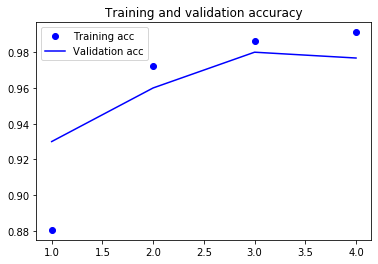

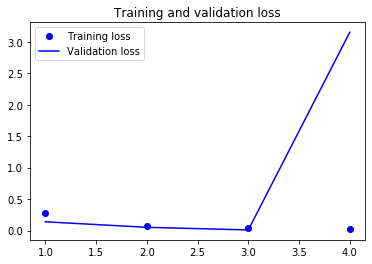

In [9]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 모델 평가 
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [10]:
test_dir = './data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [11]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)

test acc: 0.9639999866485596


## 모델의 정확도가 96%가 나왔습니다.

## 6. 모델 사용하기
- 기존에 validation에 썻던 데이터가 아닌 test 데이터로 한다.

In [12]:
predict_dir = './data/test'

predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [14]:
import numpy as np

print("-- Predict --")
output = model.predict_generator(predict_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(predict_generator.class_indices)
print(output)

-- Predict --
{'asiana_airlines': 0, 'korean_air': 1}
[[0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.463]
 [1.000]
 [0.019]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.999]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [0.005]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.023]
 [1.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.127]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.111]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.212]]


## 여기까지 하기엔 너무 Early stopping이 빠른것 같습니다. 좀 더 early stopping을 없애고 다시 훈련 해보겠습니다.



In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])


hist = model.fit_generator(
    train_generator,
    steps_per_epoch=250 * 6, # steps_per_epoch가 이미지 갯수, 우리 현재 training 이미지가 250를 -> 1500개로 이미지로 늘려줌
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감

    epochs=12,
    validation_data=validation_generator,
    validation_steps=5,)

Epoch 1/12
   6/1500 [..............................] - ETA: 12:01 - loss: 0.6827 - accuracy: 0.5167

/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1500/1500 [==============================] - 827s 552ms/step - loss: 0.2456 - accuracy: 0.8937 - val_loss: 0.2183 - val_accuracy: 0.9300
Epoch 2/12
1500/1500 [==============================] - 915s 610ms/step - loss: 0.0736 - accuracy: 0.9738 - val_loss: 0.2309 - val_accuracy: 0.9300
Epoch 3/12
1500/1500 [==============================] - 915s 610ms/step - loss: 0.0399 - accuracy: 0.9858 - val_loss: 0.0018 - val_accuracy: 0.9800
Epoch 4/12
1500/1500 [==============================] - 897s 598ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 2.1001 - val_accuracy: 0.8953
Epoch 5/12
1500/1500 [==============================] - 894s 596ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 1.7608 - val_accuracy: 0.9200
Epoch 6/12
1500/1500 [==============================] - 896s 597ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.3726 - val_accuracy: 0.9800
Epoch 7/12
1500/1500 [==============================] - 927s 618ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.001

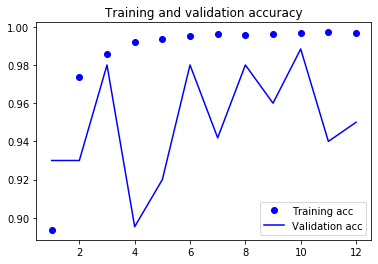

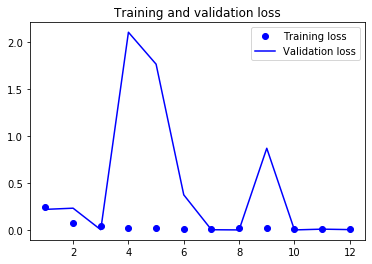

In [18]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 모델 평가 
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [19]:
test_dir = './data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [20]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)

test acc: 0.9779999852180481


## 정확도

## 6. 모델 사용하기
- 기존에 validation에 썻던 데이터가 아닌 test 데이터로 한다.

In [21]:
predict_dir = './data/test'

predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [22]:
import numpy as np

print("-- Predict --")
output = model.predict_generator(predict_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# print(predict_generator.class_indices)
# print(output)

-- Predict --


# 해당 되는 Overfitting 문제는 Multiple classfication에서 해결하고자 한다.

-----

# Appendix

## Validation data가 40개 인 경우, Loss function Oscillation 심하게 나타남

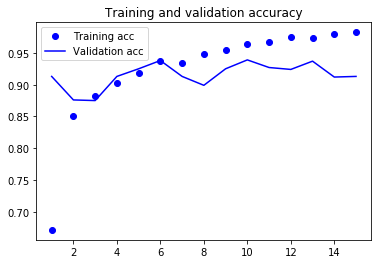

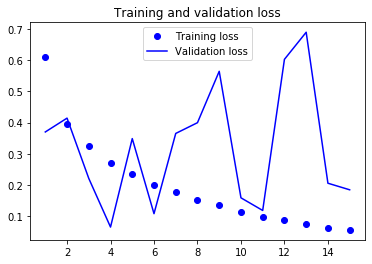

In [8]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Loss function에 Oscillation 큰 이유는 Validation의 데이터가 70 밖에 없기 때문에, 따라서 우선 Validation을 위한 데이터를 추가 해보기로 함.
## Validation data 수를 40 -> 120 까지 늘려봄

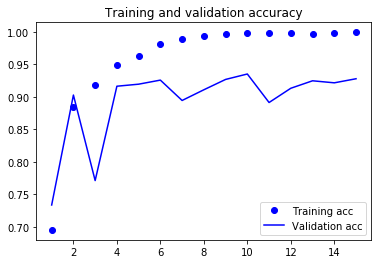

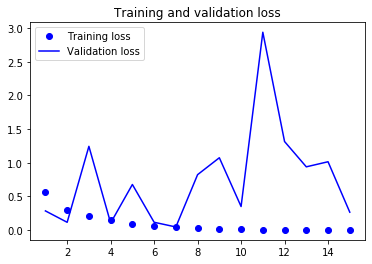

In [7]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Loss function에 대한 오실레이션은 줄어 들었다. 하지만 아직 만족 스럽지 않은 결과다.

## 10번째 쯤에서 earrly stopping을 하면 더 좋은 성능이 나올 것 같다. early stopping을 한번 써보자.

In [7]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
hist = model.fit(
    train_generator,
    steps_per_epoch=100, 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[early_stopping])
#     X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/20
100/100 [==============================] - 99s 992ms/step - loss: 0.3699 - accuracy: 0.8490 - val_loss: 0.3316 - val_accuracy: 0.8967
Epoch 2/20
100/100 [==============================] - 93s 928ms/step - loss: 0.2627 - accuracy: 0.8975 - val_loss: 0.1873 - val_accuracy: 0.8852
Epoch 3/20
100/100 [==============================] - 89s 894ms/step - loss: 0.1910 - accuracy: 0.9315 - val_loss: 0.2564 - val_accuracy: 0.9040


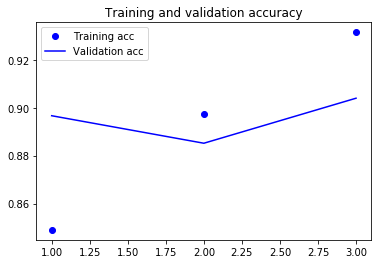

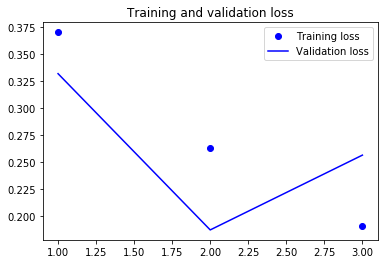

In [8]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# 드롭아웃을 포함한 새로운 컨브넷 정의 하기
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])


In [27]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련 시키기

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # 랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.2, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높에 대한 비율)
    height_shift_range=0.2,
    shear_range=0.2, # 랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2, # 랜덤하게 사진을 확대할 범위
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어 풍경/인물 사진)
    fill_mode='nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

# 검증데이터는 증식 되면 안됨
test_datagen = ImageDataGenerator(rescale=1./255) 


train_generator = train_datagen.flow_from_directory(
    train_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=32,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요함.

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=32,
    class_mode='binary') # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요함.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 500 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 62s 625ms/step - loss: 0.6405 - accuracy: 0.6221 - val_loss: 0.5148 - val_accuracy: 0.7121
Epoch 2/100
100/100 [==============================] - 60s 604ms/step - loss: 0.4947 - accuracy: 0.7632 - val_loss: 0.3520 - val_accuracy: 0.8614
Epoch 3/100
100/100 [==============================] - 62s 616ms/step - loss: 0.4118 - accuracy: 0.8172 - val_loss: 0.2529 - val_accuracy: 0.8750
Epoch 4/100
100/100 [==============================] - 62s 615ms/step - loss: 0.3024 - accuracy: 0.8774 - val_loss: 0.2381 - val_accuracy: 0.9249
Epoch 5/100
100/100 [==============================] - 61s 612ms/step - loss: 0.2478 - accuracy: 0.9022 - val_loss: 0.0901 - val_accuracy: 0.9383
Epoch 6/100
100/100 [==============================] - 61s 611ms/step - loss: 0.2285 - accuracy: 0.9051 - val_loss: 0.0162 - val_accuracy: 0.9104
Epoch 7/100
100/100 [======================

In [28]:
# 모델 저장하기
model.save('asiana_and_korean_small_2.h5')

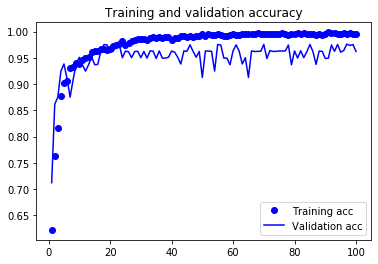

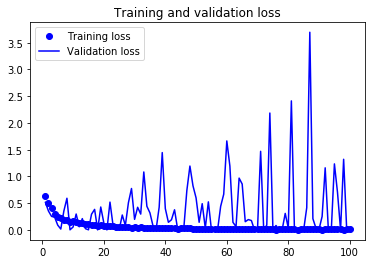

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 데이터 증식 사용하기
### 훈련할 때 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표 입니다.
### ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20, # 랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.1, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높에 대한 비율)
    height_shift_range=0.1,
    shear_range=0.1, # 랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.1, # 랜덤하게 사진을 확대할 범위
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어 풍경/인물 사진)
    fill_mode='nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략


In [19]:
# 증식된 이미지 샘플을 살펴봄

from keras.preprocessing import image

train_asiana_dir = './data/train/asiana_airlines'
train_korean_dir = './data/train/korean_air'

# test = (os.path.join(train_asiana_dir))
fname = sorted([os.path.join(train_asiana_dir, fname) for fname in os.listdir(train_asiana_dir)])


In [20]:
print(fname)

['./data/train/asiana_airlines/.DS_Store', './data/train/asiana_airlines/.ipynb_checkpoints', './data/train/asiana_airlines/asiana_airlines_1.jpg', './data/train/asiana_airlines/asiana_airlines_10.jpg', './data/train/asiana_airlines/asiana_airlines_100.jpg', './data/train/asiana_airlines/asiana_airlines_101.jpg', './data/train/asiana_airlines/asiana_airlines_102.jpg', './data/train/asiana_airlines/asiana_airlines_103.jpg', './data/train/asiana_airlines/asiana_airlines_104.jpg', './data/train/asiana_airlines/asiana_airlines_105.jpg', './data/train/asiana_airlines/asiana_airlines_106.jpg', './data/train/asiana_airlines/asiana_airlines_107.jpg', './data/train/asiana_airlines/asiana_airlines_108.jpg', './data/train/asiana_airlines/asiana_airlines_109.jpg', './data/train/asiana_airlines/asiana_airlines_11.jpg', './data/train/asiana_airlines/asiana_airlines_110.jpg', './data/train/asiana_airlines/asiana_airlines_111.jpg', './data/train/asiana_airlines/asiana_airlines_112.jpg', './data/train/

In [22]:
# 증식할 이미지를 선택합니다.

img_path = fname[3] # 증식할 이미지를 선택

img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기를 변경

x = image.img_to_array(img) # (150, 150,3) 크기의 넘파이 배열로 변환
x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환 합니다.


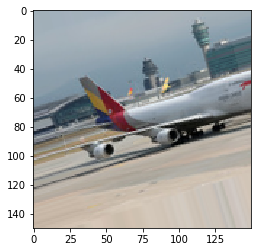

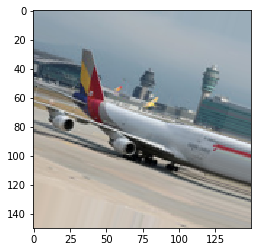

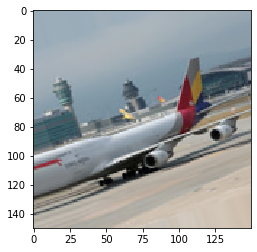

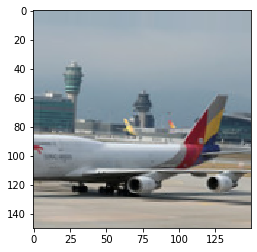

In [23]:
i = 0

# 랜덤하게 변환된 이미지 배치를 생성합니다. 무한 반복되기 때문에 어느 지점에서 중지 해야 합니다.
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

데이터 증식을 사용하여 새로운 네트워크를 훈련시킬 때 네트워크에 같은 입력 데이터가 두 번 주입되지 않습니다. 
하지만 적은 수의 원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큽니다. 
즉, 새로운 정보를 만들어 낼 수 없고 단지 기존 정보의 재조합만 가능합니다. 그렇기 때문에 완전히 과대적합을 제거 하기에 충분하지 앟을 수 있습니다.
과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout 층을 추가 하였습니다.